In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import imdb
from keras import models
from keras import layers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
  [(value, key) for (key, value) in word_index.items()]
)

In [7]:
decoded_reveiw = " ".join(
  reverse_word_index.get(i - 3, "|") for i in train_data[0]
)

In [8]:
decoded_reveiw

"| this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert | is an amazing actor and now the same being director | father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for | and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also | to the two little boy's that played the | of norman and paul they were just brilliant children are often left out of the | list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [10]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [11]:
len(X_train[0])

10000

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
X_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [57]:
model_base = models.Sequential()
model_base.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model_base.add(layers.Dense(16, activation="relu"))
model_base.add(layers.Dense(1, activation="sigmoid"))

In [58]:
model_base.compile(
  optimizer="rmsprop",
  loss="binary_crossentropy",
  metrics=["accuracy"]
)

In [59]:
history = model_base.fit(
  X_train, y_train, epochs=20, batch_size=512,
  validation_split=0.2
)

Epoch 1/20
40/40 [==============================] - 3s 40ms/step - loss: 0.4829 - accuracy: 0.7958 - val_loss: 0.3621 - val_accuracy: 0.8606
Epoch 2/20
40/40 [==============================] - 1s 31ms/step - loss: 0.2710 - accuracy: 0.9061 - val_loss: 0.2895 - val_accuracy: 0.8890
Epoch 3/20
40/40 [==============================] - 1s 27ms/step - loss: 0.2041 - accuracy: 0.9291 - val_loss: 0.2767 - val_accuracy: 0.8922
Epoch 4/20
40/40 [==============================] - 1s 26ms/step - loss: 0.1643 - accuracy: 0.9427 - val_loss: 0.3008 - val_accuracy: 0.8840
Epoch 5/20
40/40 [==============================] - 1s 26ms/step - loss: 0.1405 - accuracy: 0.9512 - val_loss: 0.3324 - val_accuracy: 0.8768
Epoch 6/20
40/40 [==============================] - 1s 25ms/step - loss: 0.1217 - accuracy: 0.9587 - val_loss: 0.3125 - val_accuracy: 0.8874
Epoch 7/20
40/40 [==============================] - 1s 24ms/step - loss: 0.1049 - accuracy: 0.9658 - val_loss: 0.3296 - val_accuracy: 0.8880
Epoch 8/20
40

In [60]:
history_dict = history.history

In [61]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [62]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

In [65]:
epochs = range(1, 20 + 1)

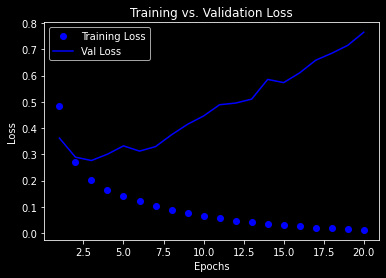

In [66]:
plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Val Loss")
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

In [67]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]


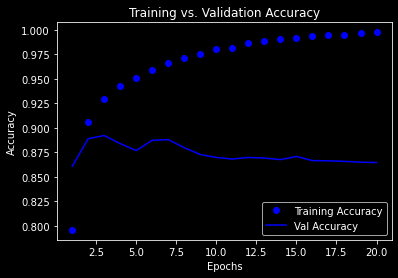

In [68]:
plt.plot(epochs, acc, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Val Accuracy")
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()

In [74]:
model_mse = models.Sequential()
model_mse.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model_mse.add(layers.Dense(32, activation="relu"))
model_mse.add(layers.Dense(16, activation="relu"))
model_mse.add(layers.Dense(1, activation="sigmoid"))

model_mse.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["accuracy"]
)

history = model_mse.fit(
  X_train, y_train, epochs=20, batch_size=512,
  validation_split=0.2
)

history_dict = history.history

Epoch 1/20
40/40 [==============================] - 5s 70ms/step - loss: 0.1511 - accuracy: 0.7788 - val_loss: 0.0947 - val_accuracy: 0.8790
Epoch 2/20
40/40 [==============================] - 2s 57ms/step - loss: 0.0737 - accuracy: 0.9059 - val_loss: 0.0815 - val_accuracy: 0.8920
Epoch 3/20
40/40 [==============================] - 2s 50ms/step - loss: 0.0553 - accuracy: 0.9291 - val_loss: 0.0807 - val_accuracy: 0.8926
Epoch 4/20
40/40 [==============================] - 2s 55ms/step - loss: 0.0413 - accuracy: 0.9496 - val_loss: 0.0863 - val_accuracy: 0.8854
Epoch 5/20
40/40 [==============================] - 2s 50ms/step - loss: 0.0338 - accuracy: 0.9597 - val_loss: 0.0892 - val_accuracy: 0.8830
Epoch 6/20
40/40 [==============================] - 2s 54ms/step - loss: 0.0231 - accuracy: 0.9736 - val_loss: 0.1001 - val_accuracy: 0.8724
Epoch 7/20
40/40 [==============================] - 2s 53ms/step - loss: 0.0218 - accuracy: 0.9735 - val_loss: 0.0915 - val_accuracy: 0.8838
Epoch 8/20
40

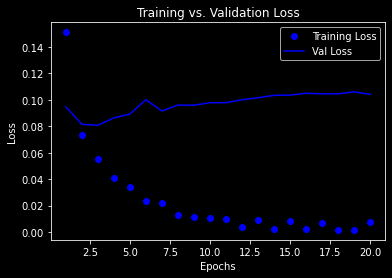

In [75]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, 20 + 1)

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Val Loss")
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

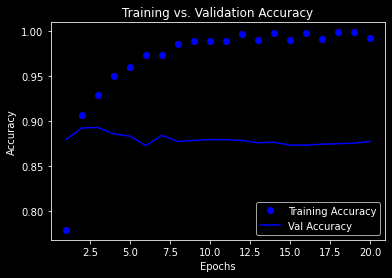

In [76]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Val Accuracy")
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()


In [77]:
model_tanh = models.Sequential()
model_tanh.add(layers.Dense(64, activation="tanh", input_shape=(10000,)))
model_tanh.add(layers.Dense(32, activation="tanh"))
model_tanh.add(layers.Dense(16, activation="tanh"))
model_tanh.add(layers.Dense(1, activation="sigmoid"))

model_tanh.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["accuracy"]
)

history = model_tanh.fit(
    X_train, y_train, epochs=20, batch_size=512,
    validation_split=0.2
)

history_dict = history.history


Epoch 1/20
40/40 [==============================] - 7s 97ms/step - loss: 0.1405 - accuracy: 0.7967 - val_loss: 0.0989 - val_accuracy: 0.8616
Epoch 2/20
40/40 [==============================] - 2s 51ms/step - loss: 0.0685 - accuracy: 0.9089 - val_loss: 0.0988 - val_accuracy: 0.8658
Epoch 3/20
40/40 [==============================] - 3s 65ms/step - loss: 0.0544 - accuracy: 0.9283 - val_loss: 0.1081 - val_accuracy: 0.8592
Epoch 4/20
40/40 [==============================] - 3s 64ms/step - loss: 0.0454 - accuracy: 0.9416 - val_loss: 0.1061 - val_accuracy: 0.8658
Epoch 5/20
40/40 [==============================] - 3s 70ms/step - loss: 0.0358 - accuracy: 0.9552 - val_loss: 0.0926 - val_accuracy: 0.8806
Epoch 6/20
40/40 [==============================] - 2s 58ms/step - loss: 0.0325 - accuracy: 0.9592 - val_loss: 0.0980 - val_accuracy: 0.8758
Epoch 7/20
40/40 [==============================] - 2s 58ms/step - loss: 0.0272 - accuracy: 0.9671 - val_loss: 0.1041 - val_accuracy: 0.8750
Epoch 8/20
40

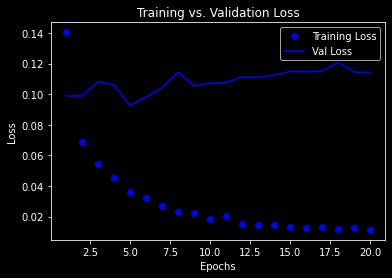

In [78]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, 20 + 1)

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Val Loss")
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

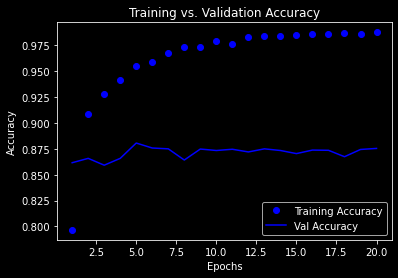

In [79]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Val Accuracy")
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()
